In [1]:
import pandas as pd
import numpy as np

# Let's bring in the dataset
df = pd.read_csv('ecommerce_customer_data_custom_ratios.csv', encoding='latin1', low_memory=False)

# A quick look at what we're working with
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,08-09-2020 09:38,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,05-03-2022 12:56,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,23-05-2022 18:18,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,12-11-2020 13:13,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,27-11-2020 17:55,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [2]:
# Clean up the column headers to make them easier to type
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

# Check the new names
print("New column names:", df.columns.tolist())

New column names: ['customer_id', 'purchase_date', 'product_category', 'product_price', 'quantity', 'total_purchase_amount', 'payment_method', 'customer_age', 'returns', 'customer_name', 'age', 'gender', 'churn']


In [3]:
# Converting the purchase date to a proper datetime object
# Based on the data, the format seems to be Day-Month-Year
df['purchase_date_parsed'] = pd.to_datetime(df['purchase_date'], dayfirst=True, errors='coerce')

# Let's see if we missed any (NaT means the date couldn't be read)
print(f"Dates failed to parse: {df['purchase_date_parsed'].isna().sum()}")

Dates failed to parse: 0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   customer_id            250000 non-null  int64         
 1   purchase_date          250000 non-null  object        
 2   product_category       250000 non-null  object        
 3   product_price          250000 non-null  int64         
 4   quantity               250000 non-null  int64         
 5   total_purchase_amount  250000 non-null  int64         
 6   payment_method         250000 non-null  object        
 7   customer_age           250000 non-null  int64         
 8   returns                202404 non-null  float64       
 9   customer_name          250000 non-null  object        
 10  age                    250000 non-null  int64         
 11  gender                 250000 non-null  object        
 12  churn                  250000 non-null  int6

In [10]:
df['returns'] = df['returns'].fillna(0)
print(df['returns'])

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
249995    1.0
249996    1.0
249997    0.0
249998    0.0
249999    1.0
Name: returns, Length: 250000, dtype: float64


In [11]:
sales_col = 'total_purchase_amount'

avg_sales = df[sales_col].mean()
median_sales = df[sales_col].median()

print(f"Average Transaction: ${avg_sales:.2f}")
print(f"Median Transaction:  ${median_sales:.2f}")
print("\nFull Sales Distribution:")
print(df[sales_col].describe())

Average Transaction: $2725.37
Median Transaction:  $2724.00

Full Sales Distribution:
count    250000.000000
mean       2725.370732
std        1442.933565
min         100.000000
25%        1477.000000
50%        2724.000000
75%        3974.000000
max        5350.000000
Name: total_purchase_amount, dtype: float64


In [12]:
# Creating helper columns for our charts
df['order_year'] = df['purchase_date_parsed'].dt.year
df['order_quarter'] = df['purchase_date_parsed'].dt.quarter
df['order_month'] = df['purchase_date_parsed'].dt.month
print(df['order_year'] )
print(df['order_quarter'])
print(df['order_month'])

0         2020
1         2022
2         2022
3         2020
4         2020
          ... 
249995    2023
249996    2021
249997    2020
249998    2020
249999    2021
Name: order_year, Length: 250000, dtype: int32
0         3
1         1
2         2
3         4
4         4
         ..
249995    3
249996    4
249997    3
249998    4
249999    1
Name: order_quarter, Length: 250000, dtype: int32
0          9
1          3
2          5
3         11
4         11
          ..
249995     8
249996    11
249997     7
249998    12
249999     3
Name: order_month, Length: 250000, dtype: int32


In [13]:
# Grouping the data for the graphs
yearly_sales = df.groupby('order_year')[sales_col].sum()
monthly_sales = df.groupby(['order_year', 'order_month'])[sales_col].sum().reset_index()
quarterly_sales = df.groupby(['order_year', 'order_quarter'])[sales_col].sum().reset_index()
print(yearly_sales)
print(monthly_sales)
print(quarterly_sales)

order_year
2020    185276174
2021    182843403
2022    182925502
2023    130297604
Name: total_purchase_amount, dtype: int64
    order_year  order_month  total_purchase_amount
0         2020            1               15442459
1         2020            2               14561593
2         2020            3               15537311
3         2020            4               14847491
4         2020            5               15395782
5         2020            6               14980739
6         2020            7               16003821
7         2020            8               15954931
8         2020            9               14969811
9         2020           10               15799599
10        2020           11               15497095
11        2020           12               16285542
12        2021            1               15522423
13        2021            2               14207789
14        2021            3               16037760
15        2021            4               14955289
16      

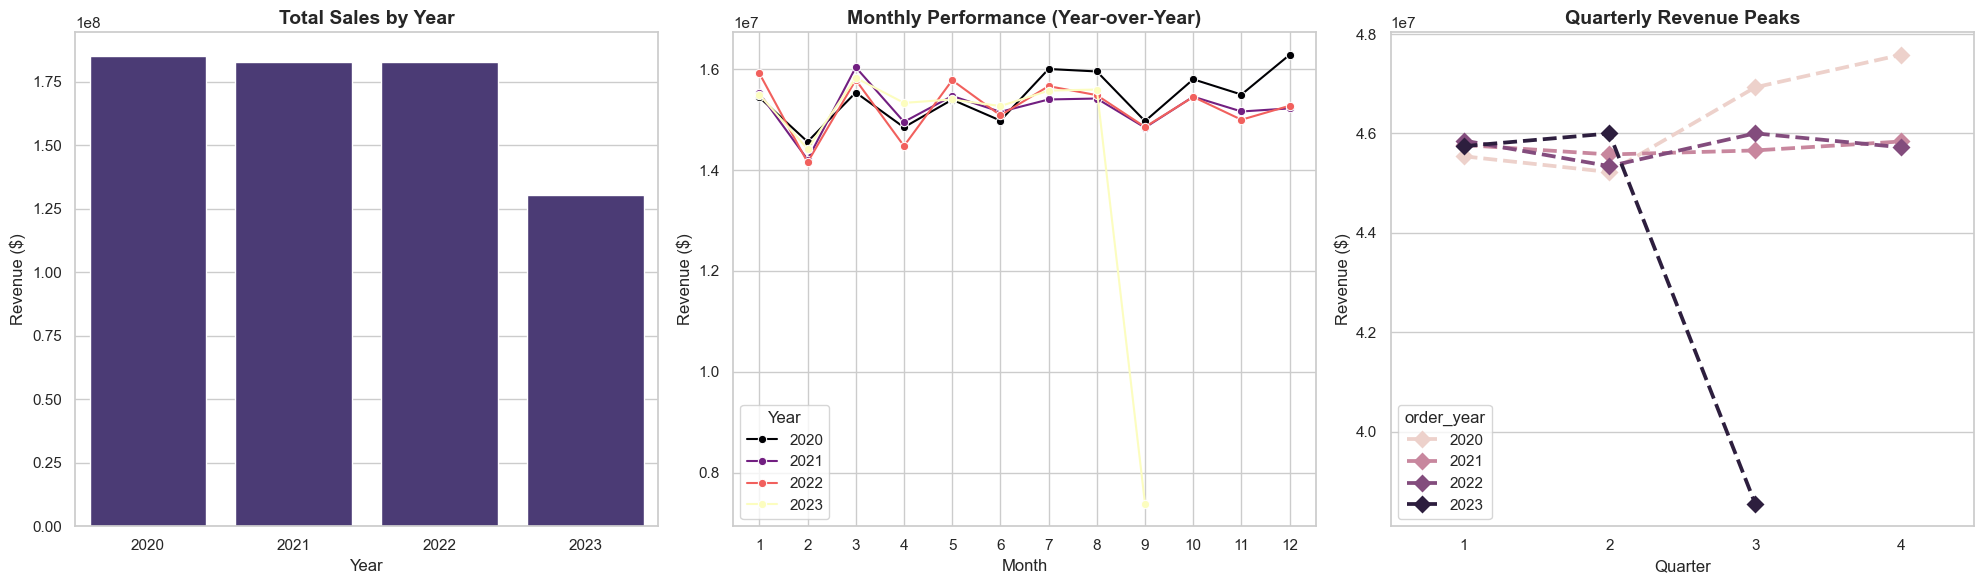

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional visual theme
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.dpi'] = 100

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Yearly Trend (Bar Chart for clear comparison)
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, ax=axes[0])
axes[0].set_title('Total Sales by Year', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Revenue ($)')

# 2. Monthly Trend (Multi-line chart)
sns.lineplot(data=monthly_sales, x='order_month', y=sales_col, hue='order_year', 
             marker='o', palette='magma', ax=axes[1])
axes[1].set_title('Monthly Performance (Year-over-Year)', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(1, 13))
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Revenue ($)')
axes[1].legend(title='Year')

# 3. Quarterly Snapshot
sns.pointplot(data=quarterly_sales, x='order_quarter', y=sales_col, hue='order_year', 
              ax=axes[2], markers='D', linestyles='--')
axes[2].set_title('Quarterly Revenue Peaks', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Quarter')
axes[2].set_ylabel('Revenue ($)')

plt.tight_layout()
plt.show()